### Example experiments showing systemic exclusion reduction with randomization when claims are known

In [1]:
from claims_known import experiment
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
SR = 0.25
NOISE = 0.05

e = experiment("normal", 0.5, 0.15)
normal = e.systemic_exclusion(partial=0, selection_rate=SR, noise_std=NOISE)

e = experiment("inv_normal", 0.5, 0.15)
inv_normal = e.systemic_exclusion(partial=0, selection_rate=SR, noise_std=NOISE)

e = experiment("uniform")
uniform = e.systemic_exclusion(partial=0, selection_rate=SR, noise_std=NOISE)

e = experiment("pareto", 2, 1)
pareto = e.systemic_exclusion(partial=0, selection_rate=SR, noise_std=NOISE)

e = experiment("inv_pareto", 2, 1)
inv_pareto = e.systemic_exclusion(partial=0, selection_rate=SR, noise_std=NOISE)

100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 194.63it/s]


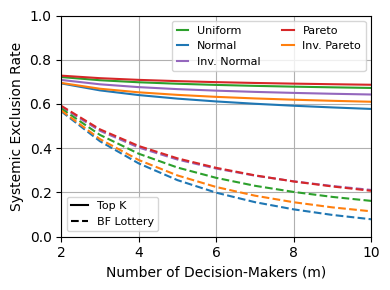

In [3]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

plt.plot(uniform["m"], uniform['determ'], color="#2ca02c", label="Uniform")
plt.plot(normal["m"], normal['determ'], color="#1f77b4", label="Normal")
plt.plot(inv_normal["m"], inv_normal['determ'], color="#9467bd", label="Inv. Normal")
plt.plot(pareto["m"], pareto['determ'], color="#d62728", label="Pareto")
plt.plot(inv_pareto["m"], inv_pareto['determ'], color="#ff7f0e", label="Inv. Pareto")

plt.plot(normal["m"], normal['random'], linestyle="dashed", color="#1f77b4")
plt.plot(inv_normal["m"], inv_normal['random'], linestyle="dashed", color="#9467bd")
plt.plot(uniform["m"], uniform['random'], linestyle="dashed", color="#2ca02c")
plt.plot(pareto["m"], pareto['random'], linestyle="dashed", color="#d62728")
plt.plot(inv_pareto["m"], inv_pareto['random'], linestyle="dashed", color="#ff7f0e")


first_legend = plt.legend(loc="upper right", ncols=2, handlelength=1, fontsize=8)
ax = plt.gca().add_artist(first_legend)


plt.xlim([2,10])
plt.ylim([0,1.0])
#plt.yticks([0, 0.15, 0.3, 0.45, 0.6, 0.75])
plt.ylabel("Systemic Exclusion Rate")
plt.xlabel("Number of Decision-Makers (m)")

blue_line = mlines.Line2D([], [], color='k', linestyle="-", label="Top K")
blue_line2 = mlines.Line2D([], [], color='k', linestyle="--", label="BF Lottery")

plt.legend(handles=[blue_line, blue_line2], loc="lower left", handlelength=1.5, fontsize=8)

plt.grid()
plt.tight_layout()
plt.savefig('claims_ser_25_5.jpg', format='jpg', dpi=500)
plt.show()

In [4]:
e = experiment("normal", 0.5, 0.15)
normal = e.systemic_exclusion(partial=0, selection_rate=0.5, noise_std=0.025)
normal_partial = e.systemic_exclusion(partial=0.5, selection_rate=0.5, noise_std=0.025)

e = experiment("inv_pareto", 2, 1)
inv_pareto = e.systemic_exclusion(partial=0, selection_rate=0.5, noise_std=0.025)
inv_pareto_partial = e.systemic_exclusion(partial=0.5, selection_rate=0.5, noise_std=0.025)

100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 197.99it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


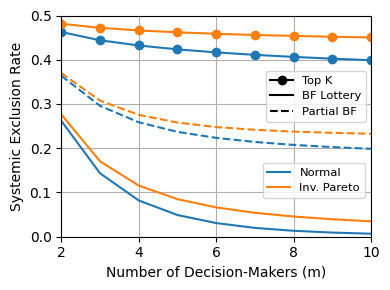

In [5]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

plt.plot(normal["m"], normal['determ'], marker="o", color="#1f77b4")
plt.plot(inv_pareto["m"], inv_pareto['determ'], marker="o", color="#ff7f0e")

plt.plot(normal["m"], normal['random'], color="#1f77b4")
plt.plot(inv_pareto["m"], inv_pareto['random'], color="#ff7f0e")

plt.plot(normal_partial["m"], normal_partial['random'], linestyle="--", color="#1f77b4")
plt.plot(inv_pareto_partial["m"], inv_pareto_partial['random'], linestyle="--", color="#ff7f0e")

plt.xlim([2,10])
plt.ylim([0,0.5])
plt.ylabel("Systemic Exclusion Rate")
plt.xlabel("Number of Decision-Makers (m)")

blue_line = mlines.Line2D([], [], color='k', marker="o", label="Top K")
blue_line2 = mlines.Line2D([], [], color='k', label="BF Lottery")
blue_line3 = mlines.Line2D([], [], color='k', linestyle="--", label="Partial BF")

first_legend = plt.legend(handles=[blue_line, blue_line2, blue_line3], loc=(0.66,0.52), fontsize=8.25)
ax = plt.gca().add_artist(first_legend)


blue_line = mlines.Line2D([], [], color='#1f77b4', label="Normal")
blue_line2 = mlines.Line2D([], [], color='#ff7f0e', label="Inv. Pareto")

plt.legend(handles=[blue_line, blue_line2], loc=(0.65,0.175), fontsize=8.25)

plt.grid()
plt.tight_layout()
plt.savefig('2_claims_ser_partial.eps', format='eps', dpi=1000)
plt.show()